# Import necessary Librries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/robi-datathon-2-pre-assessment/sample_submission.csv
/kaggle/input/robi-datathon-2-pre-assessment/train.csv
/kaggle/input/robi-datathon-2-pre-assessment/test.csv


In [2]:
import plotly.express as px
import  matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

import scipy.stats as stats
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

#ML Librarires  & import libraries for evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

from numpy import mean
from sklearn.svm import SVC
from sklearn import preprocessing

# Train Data Read

In [3]:
train_df = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/train.csv')
train_df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,NaN,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,M,Y,Y,1,D,C,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: C,b,11.533397,2.062749,9,2.732090,-32.865595,0.008230,-8.885964,1.845862,10.660651,11.704121,1.568647,0,0,0.687640,6,0
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,M,Y,Y,1,B,D,B,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,b,16.804580,2.671386,9,7.378877,-32.577193,0.007366,-8.818020,1.535369,8.155031,11.555441,1.543350,0,0,0.983840,5,1
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,M,Y,Y,1,B,C,B,0,l,,NaN,NaN,NaN,NaN,A,NaN,~1,op: C,b,12.496399,2.437981,3,7.066580,-32.312062,0.022486,-9.249317,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,F,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,17.623142,2.284035,6,8.069883,-32.359032,0.013593,-9.042350,1.510002,10.661686,11.276986,1.779480,0,0,0.557019,0,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,M,Y,N,1,D,D,B,0,1,,NaN,kk,NaN,NaN,B,NaN,x,op: D,b,4.387913,0.837727,6,8.326920,-32.641060,0.012796,-9.326015,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1,0


# Test Data Read

In [4]:
test_df = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/test.csv')
test_df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,d,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,,NaN,NaN,NaN,NaN,A,NaN,~1,op: C,b,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,b,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,,NaN,kk,NaN,NaN,B,NaN,x,op: C,b,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0
5,b'gAAAAABinOjXAODyYIVqRlaoPYbx-Jv8eRgDswdtPGjv...,M,Y,Y,1,D,D,B,0,1,,bb,NaN,NaN,NaN,A,NaN,x,op: D,b,10.514884,1.399393,8,4.871093,-33.030258,0.006217,-8.691409,1.524488,8.477102,11.503684,1.824085,0,0,0.787256,6
6,b'gAAAAABinOisnbt53eXCkLke8jizXWRz7--dNFUc7_Kv...,M,N,Y,1,B,D,C,1,l,,a2,NaN,NaN,NaN,B,NaN,~1,op: D,c,6.561813,1.090859,3,5.991672,-32.577742,0.010729,-9.233940,1.490601,7.347506,5.708466,1.593072,0,0,0.878133,1
7,b'gAAAAABinOiyF59tNYeyeqJgOghB-WdrHMvt0VlyS6Ea...,M,Y,Y,1,D,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,x,op: D,b,15.540453,1.423552,7,6.061921,-32.873866,0.005381,-8.779382,1.718437,5.376519,10.905976,1.895801,0,0,0.769569,6
8,b'gAAAAABinOjR9YDjuAxxfRNtfd_3BVP0tadTnZSmQhOw...,M,N,Y,1,B,D,B,1,1,,NaN,NaN,NaN,NaN,B,NaN,~1,op: D,b,12.393099,2.587553,8,6.021687,-33.074180,0.009376,-8.809759,1.962656,6.780483,11.438956,1.847398,0,0,0.905184,2
9,b'gAAAAABinOjFpdyJwRKQxC-tnq4zhpFb7zg2T0jh2tOY...,M,Y,N,1,B,B,D,1,l,,NaN,NaN,NaN,NaN,B,NaN,~1,op: B,d,8.424779,1.321590,6,2.467512,-32.450662,0.018922,-9.143473,1.532382,2.911209,3.701080,1.843613,0,0,0.792054,2


# Sample submission Data Read

In [5]:
df_submission = pd.read_csv('/kaggle/input/robi-datathon-2-pre-assessment/sample_submission.csv')
df_submission.head(10)

,id,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,1
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,1
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,0


# Data Pre-Processing, Data Cleaning & Exploratory Data Analysis(EDA), Feature Engineering,

In [6]:
# missing values cheacking at train_df

# train_df.apply(lambda x: sum(x.isnull()),axis=0)

train_df.isnull().sum()

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       25694
s55       25116
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [7]:
# missing values cheacking at test_df

test_df.apply(lambda x: sum(x.isnull()),axis=0)

id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54       77322
s55       75644
s56       85065
s57       85065
s58           0
s59       85065
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
dtype: int64

In [8]:
# train_df[['s54','s55']] = train_df[['s54','s55']].apply(lambda x: x.str.strip()).replace('', np.nan)

# Replacing the empty records with default value

train_df['s54'].fillna('xx', inplace=True)

train_df['s55'].fillna('xx', inplace=True)

test_df['s54'].fillna('xx', inplace=True)

test_df['s55'].fillna('xx', inplace=True)


In [9]:
train_df.isnull().sum()


id            0
gender        0
s11           0
s12           0
s13           0
s16           0
s17           0
s18           0
s48           0
s52           0
s53           0
s54           0
s55           0
s56       28322
s57       28322
s58           0
s59       28322
s69           0
s70           0
s71           0
n1            0
n2            0
n3            0
n4            0
n5            0
n6            0
n7            0
n8            0
n9            0
n10           0
n11           0
n12           0
n13           0
n14           0
n15           0
label         0
dtype: int64

In [10]:
train_df.head(10)

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,xx,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,xx,xx,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,M,Y,Y,1,D,C,B,1,1,,xx,xx,NaN,NaN,B,NaN,x,op: C,b,11.533397,2.062749,9,2.732090,-32.865595,0.008230,-8.885964,1.845862,10.660651,11.704121,1.568647,0,0,0.687640,6,0
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,M,Y,Y,1,B,D,B,1,l,,xx,xx,NaN,NaN,B,NaN,~1,op: D,b,16.804580,2.671386,9,7.378877,-32.577193,0.007366,-8.818020,1.535369,8.155031,11.555441,1.543350,0,0,0.983840,5,1
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,M,Y,Y,1,B,C,B,0,l,,xx,xx,NaN,NaN,A,NaN,~1,op: C,b,12.496399,2.437981,3,7.066580,-32.312062,0.022486,-9.249317,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,F,Y,Y,1,D,D,B,0,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,17.623142,2.284035,6,8.069883,-32.359032,0.013593,-9.042350,1.510002,10.661686,11.276986,1.779480,0,0,0.557019,0,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,M,Y,N,1,D,D,B,0,1,,xx,kk,NaN,NaN,B,NaN,x,op: D,b,4.387913,0.837727,6,8.326920,-32.641060,0.012796,-9.326015,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1,0


In [11]:
# Investigate all the elements within each Feature 

for column in train_df:
    unique_vals = np.unique(train_df[column])
    nr_values = len(unique_vals)
    if nr_values < 20:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))
        

The number of values for feature id :28322
The number of values for feature gender :2 -- ['F' 'M']
The number of values for feature s11 :2 -- ['N' 'Y']
The number of values for feature s12 :2 -- ['N' 'Y']
The number of values for feature s13 :2 -- [0 1]
The number of values for feature s16 :4 -- ['A' 'B' 'C' 'D']
The number of values for feature s17 :4 -- ['A' 'B' 'C' 'D']
The number of values for feature s18 :4 -- ['A' 'B' 'C' 'D']
The number of values for feature s48 :2 -- [0 1]
The number of values for feature s52 :4 -- ['0' '1' 'l' 'o']
The number of values for feature s53 :2 -- [' ' '  ']
The number of values for feature s54 :10 -- ['22' '2a' '2b' 'a2' 'aa' 'ab' 'b2' 'ba' 'bb' 'xx']
The number of values for feature s55 :10 -- ['22' '2K' '2k' 'K2' 'KK' 'Kk' 'k2' 'kK' 'kk' 'xx']
The number of values for feature s56 :1 -- [nan]
The number of values for feature s57 :1 -- [nan]
The number of values for feature s58 :2 -- ['A' 'B']
The number of values for feature s59 :1 -- [nan]
The num

In [12]:
train_df.reindex()
df=train_df.drop(columns=['s56','s57','s59'],axis=1)

In [13]:
test_df.reindex()
test=test_df.drop(columns=['s56','s57','s59'],axis=1)

In [14]:
test

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s58,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,M,Y,Y,1,B,D,D,0,l,,xx,xx,B,~1,op: D,d,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,M,Y,Y,1,B,C,B,1,l,,xx,xx,A,~1,op: C,b,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,M,Y,N,1,B,D,B,1,l,,xx,xx,B,~1,op: D,b,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,M,Y,Y,1,D,D,B,0,1,,xx,xx,B,x,op: D,b,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,M,Y,Y,1,D,C,B,1,1,,xx,kk,B,x,op: C,b,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85060,b'gAAAAABinOjbnJVk2-nOVQsYB9p4DK26fTLLik_UR2H0...,M,Y,Y,1,C,C,C,1,l,,xx,xx,B,C`,op: C,c,10.547381,1.452660,7,8.000085,-32.578221,0.011017,-8.994304,1.581816,9.265657,5.604845,1.746737,0,0,0.751100,0
85061,b'gAAAAABinOi7ixyXrlKYlx8D9i0-TIPD5elP2k-vuekn...,M,Y,Y,1,B,C,C,1,l,,xx,xx,B,~1,op: C,c,10.149117,2.168239,6,6.011115,-32.447282,0.019550,-9.131275,1.526110,7.823166,5.458373,1.669676,0,0,0.903294,3
85062,b'gAAAAABinOi31zWSlD0OMhbBd3_weh7Kq6aPeO4yYqns...,M,N,Y,1,D,A,C,1,1,,xx,2k,B,x,op: A,c,3.744380,0.661328,2,2.112016,-32.351165,0.015461,-9.249529,1.505547,6.438985,3.429928,1.500925,0,0,0.571895,3
85063,b'gAAAAABinOjIe7jFVk9k7jiH8Y3rdpUHDTZG2T2isunp...,M,N,Y,1,B,D,D,1,l,,xx,xx,B,~1,op: D,d,10.194615,1.557863,2,2.433086,-32.363871,0.010612,-9.229158,1.833286,5.383311,6.212552,1.730987,0,0,0.655693,6


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85065 entries, 0 to 85064
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      85065 non-null  object 
 1   gender  85065 non-null  object 
 2   s11     85065 non-null  object 
 3   s12     85065 non-null  object 
 4   s13     85065 non-null  int64  
 5   s16     85065 non-null  object 
 6   s17     85065 non-null  object 
 7   s18     85065 non-null  object 
 8   s48     85065 non-null  int64  
 9   s52     85065 non-null  object 
 10  s53     85065 non-null  object 
 11  s54     85065 non-null  object 
 12  s55     85065 non-null  object 
 13  s58     85065 non-null  object 
 14  s69     85065 non-null  object 
 15  s70     85065 non-null  object 
 16  s71     85065 non-null  object 
 17  n1      85065 non-null  float64
 18  n2      85065 non-null  float64
 19  n3      85065 non-null  int64  
 20  n4      85065 non-null  float64
 21  n5      85065 non-null  float64
 22

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      28322 non-null  object 
 1   gender  28322 non-null  object 
 2   s11     28322 non-null  object 
 3   s12     28322 non-null  object 
 4   s13     28322 non-null  int64  
 5   s16     28322 non-null  object 
 6   s17     28322 non-null  object 
 7   s18     28322 non-null  object 
 8   s48     28322 non-null  int64  
 9   s52     28322 non-null  object 
 10  s53     28322 non-null  object 
 11  s54     28322 non-null  object 
 12  s55     28322 non-null  object 
 13  s58     28322 non-null  object 
 14  s69     28322 non-null  object 
 15  s70     28322 non-null  object 
 16  s71     28322 non-null  object 
 17  n1      28322 non-null  float64
 18  n2      28322 non-null  float64
 19  n3      28322 non-null  int64  
 20  n4      28322 non-null  float64
 21  n5      28322 non-null  float64
 22

In [17]:
df.columns

Index(['id', 'gender', 's11', 's12', 's13', 's16', 's17', 's18', 's48', 's52',
       's53', 's54', 's55', 's58', 's69', 's70', 's71', 'n1', 'n2', 'n3', 'n4',
       'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15',
       'label'],
      dtype='object')

In [18]:
df.describe()

,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
count,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000,28322.000000
mean,0.983123,0.433338,10.201863,1.600111,4.805099,5.080537,-32.641183,0.015014,-9.107429,1.612428,5.232644,6.115109,1.699553,0.009992,0.089506,0.497570,2.997740,0.168067
std,0.128814,0.495545,4.414660,0.664985,2.199282,2.276162,0.241453,0.006550,0.205200,0.173560,2.179705,2.474138,0.115150,0.099462,0.285478,0.289207,2.007611,0.373933
min,0.000000,0.000000,2.200736,0.311727,0.000000,1.700370,-33.167589,0.000584,-9.517986,1.178469,2.508858,1.173465,1.500006,0.000000,0.000000,0.000101,0.000000,0.000000
25%,1.000000,0.000000,6.592127,1.013540,3.000000,2.833161,-32.862207,0.009195,-9.258473,1.489924,3.464229,4.414671,1.600056,0.000000,0.000000,0.247801,1.000000,0.000000
50%,1.000000,0.000000,9.535961,1.462197,5.000000,4.840320,-32.577026,0.016053,-9.174557,1.537263,4.461770,5.317154,1.698556,0.000000,0.000000,0.495255,3.000000,0.000000
75%,1.000000,1.000000,14.432580,2.194510,6.000000,7.300738,-32.396733,0.018771,-8.964786,1.730249,6.524341,7.027610,1.799238,0.000000,0.000000,0.748786,5.000000,0.000000
max,1.000000,1.000000,20.882733,3.137331,9.000000,8.594620,-32.289180,0.029992,-8.586583,2.173593,11.214870,12.029135,1.899995,1.000000,1.000000,0.999990,6.000000,1.000000


In [19]:
# label encoding Handalling  using Dummy values from pandas data frame

df = pd.get_dummies(df, columns=['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54', 's55', 's58', 's69', 's70', 's71'])


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28322 entries, 0 to 28321
Data columns (total 77 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         28322 non-null  object 
 1   s13        28322 non-null  int64  
 2   s48        28322 non-null  int64  
 3   n1         28322 non-null  float64
 4   n2         28322 non-null  float64
 5   n3         28322 non-null  int64  
 6   n4         28322 non-null  float64
 7   n5         28322 non-null  float64
 8   n6         28322 non-null  float64
 9   n7         28322 non-null  float64
 10  n8         28322 non-null  float64
 11  n9         28322 non-null  float64
 12  n10        28322 non-null  float64
 13  n11        28322 non-null  float64
 14  n12        28322 non-null  int64  
 15  n13        28322 non-null  int64  
 16  n14        28322 non-null  float64
 17  n15        28322 non-null  int64  
 18  label      28322 non-null  int64  
 19  gender_F   28322 non-null  uint8  
 20  gender

In [21]:
df.head(10)

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label,gender_F,gender_M,s11_N,s11_Y,s12_N,s12_Y,s16_A,s16_B,s16_C,s16_D,s17_A,s17_B,s17_C,s17_D,s18_A,s18_B,s18_C,s18_D,s52_0,s52_1,s52_l,s52_o,s53_,s53_,s54_22,s54_2a,s54_2b,s54_a2,s54_aa,s54_ab,s54_b2,s54_ba,s54_bb,s54_xx,s55_22,s55_2K,s55_2k,s55_K2,s55_KK,s55_Kk,s55_k2,s55_kK,s55_kk,s55_xx,s58_A,s58_B,s69_0,s69_C`,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,1,0,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,1,1,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,1,0,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,1,0,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,1,1,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
5,b'gAAAAABinOiWbgAxe8Uy9tboiJGZEYK7zcGy6fv8_5Ao...,1,1,11.533397,2.062749,9,2.732090,-32.865595,0.008230,-8.885964,1.845862,10.660651,11.704121,1.568647,0,0,0.687640,6,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0
6,b'gAAAAABinOiYFRgmHZu5sLaAYKtwJbRhPnjCYPVxQPNf...,1,1,16.804580,2.671386,9,7.378877,-32.577193,0.007366,-8.818020,1.535369,8.155031,11.555441,1.543350,0,0,0.983840,5,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
7,b'gAAAAABinOiXQjg5rjPZsHSAQrJhP8u_21fwETW89EFN...,1,0,12.496399,2.437981,3,7.066580,-32.312062,0.022486,-9.249317,1.811164,2.822841,6.590523,1.694829,0,0,0.777798,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
8,b'gAAAAABinOic9rpK09lv7Q2k7bMbzXsT0ZluA8SfT7x0...,1,0,17.623142,2.284035,6,8.069883,-32.359032,0.013593,-9.042350,1.510002,10.661686,11.276986,1.779480,0,0,0.557019,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
9,b'gAAAAABinOiWr-5MKlXYJ9hkIMYLh2XNHJeYWIIpt94I...,1,0,4.387913,0.837727,6,8.326920,-32.641060,0.012796,-9.326015,1.383908,2.671842,3.940305,1.716165,0,0,0.212874,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


# Label encoding For Test data

In [22]:
#label encoding Handalling  using Dummy values from pandas data frame

test = pd.get_dummies(test, columns=['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54', 's55', 's58', 's69', 's70', 's71'])

In [23]:
test.head()

,id,s13,s48,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,gender_F,gender_M,s11_N,s11_Y,s12_N,s12_Y,s16_A,s16_B,s16_C,s16_D,s17_A,s17_B,s17_C,s17_D,s18_A,s18_B,s18_C,s18_D,s52_0,s52_1,s52_l,s52_o,s53_,s53_,s54_22,s54_2a,s54_2b,s54_a2,s54_aa,s54_ab,s54_b2,s54_ba,s54_bb,s54_xx,s55_22,s55_2K,s55_2k,s55_K2,s55_KK,s55_Kk,s55_k2,s55_kK,s55_kk,s55_xx,s58_A,s58_B,s69_0,s69_C`,s69_x,s69_~1,s70_op: A,s70_op: B,s70_op: C,s70_op: D,s71_a,s71_b,s71_c,s71_d
0,b'gAAAAABinOi328DZcweGB4_nOyHA3Dy6o1YKYKyf3COx...,1,0,17.362752,2.985283,3,2.052415,-32.339904,0.026301,-9.200175,2.122970,6.646617,4.801224,1.693087,0,0,0.439270,2,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1
1,b'gAAAAABinOikutEIBjkUXl9lYTg4RI6jc4NfiMUCcVsn...,1,1,15.892228,2.389056,7,6.928142,-32.356092,0.010774,-8.897092,1.770889,11.046294,6.407230,1.516728,0,0,0.084334,4,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0
2,b'gAAAAABinOjBM70jBXOroAlUSq5lNXMd_oP0PU7jLQE5...,1,1,10.893303,1.470903,6,2.210629,-32.397871,0.016837,-9.173660,1.871872,2.805834,5.481219,1.788823,0,0,0.984210,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0
3,b'gAAAAABinOimitAnqlgOcqnD_LeNL3WEbXNGvjd3QVPi...,1,0,9.876850,1.442493,3,2.350379,-32.836003,0.015684,-9.178200,1.675028,6.354938,5.427266,1.792147,0,0,0.003492,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
4,b'gAAAAABinOi3W9p3Oka5MV_dc2TeorZUcIWOnnODSx7E...,1,1,11.674406,2.544719,8,8.136887,-32.577495,0.006406,-8.726633,1.963535,6.810158,11.487845,1.880992,0,0,0.060614,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


# Data Visualization & distribution

In [24]:
df = df
fig = px.pie(df, names='label', width=1200)
fig.show()

<AxesSubplot:>

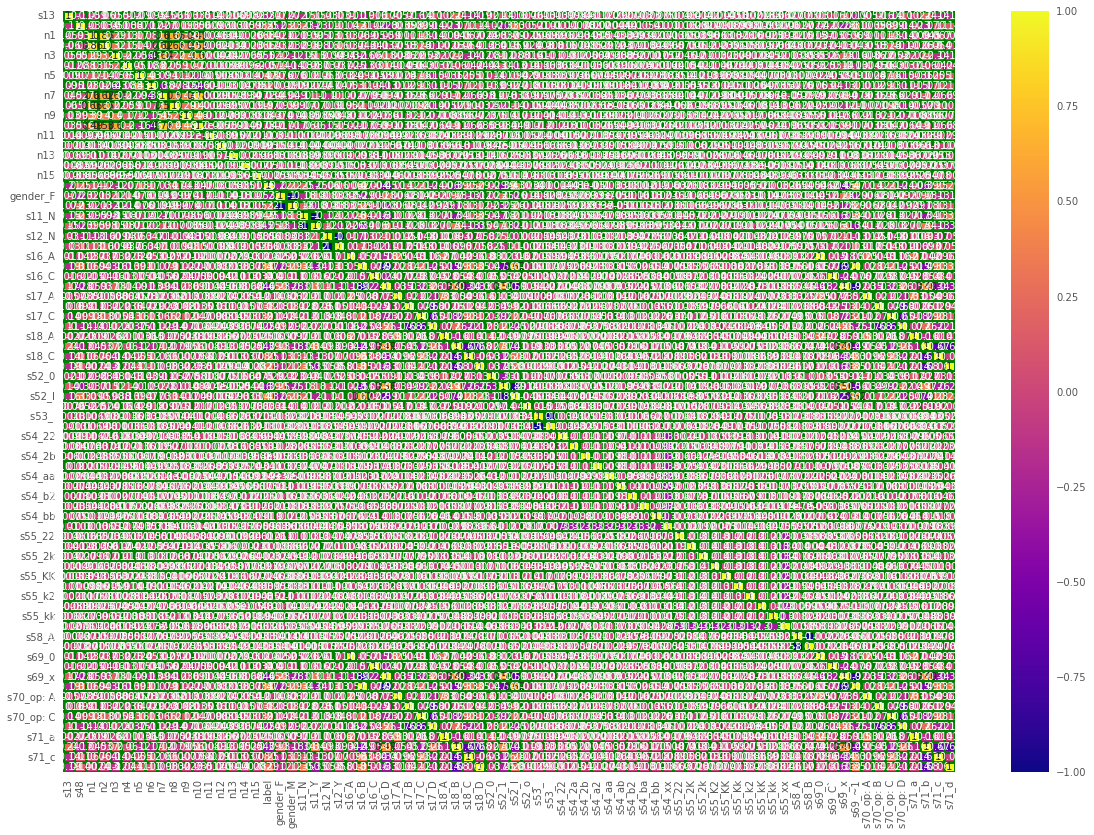

In [25]:
# Plotting data 

plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidths=3,cmap = 'plasma')

# Data Correlation

<AxesSubplot:xlabel='label', ylabel='count'>

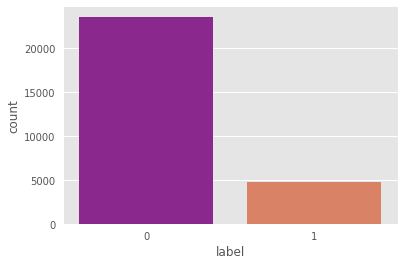

In [26]:
# checking the target variable countplot
sns.countplot(data=df,x = 'label',palette='plasma')

In [27]:
# missing values cheacking at df

df.apply(lambda x: sum(x.isnull()),axis=0)

id           0
s13          0
s48          0
n1           0
n2           0
            ..
s70_op: D    0
s71_a        0
s71_b        0
s71_c        0
s71_d        0
Length: 77, dtype: int64

# Data Split , Feature Selections,  Machine Learning Part

In [28]:
X = np.array(df.drop(['id','label'], 1)) # choosing X array for Feature Columns
y = np.array(df['label']) # Target Column

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [29]:
X

array([[ 1.        ,  0.        , 16.14466597, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  7.14455819, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  6.92323603, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        , 13.42979701, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 16.09462206, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        ,  7.05810713, ...,  1.        ,
         0.        ,  0.        ]])

In [30]:
y

array([0, 1, 0, ..., 0, 0, 0])

# Test data for prediction

In [31]:
test = np.array(test.drop(['id'], 1)) # choosing test array for prediction Columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [32]:
test

array([[ 1.        ,  0.        , 17.36275238, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 15.89222807, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 10.89330326, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  1.        ,  3.74437962, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.        ,  1.        , 10.19461514, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        , 10.1096544 , ...,  1.        ,
         0.        ,  0.        ]])

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score = cross_val_score(model,X,y,cv=10)
    print(score)
    print('CV Score:',np.mean(score))
    

In [34]:
# Predicting Using lgb boosing algorithm

from lightgbm import LGBMClassifier

model = LGBMClassifier()

model.fit(X, y)

LGBMClassifier()

In [35]:
classify(model,X,y)

Accuracy: 0.8852603706972639
[0.86268973 0.87927992 0.88418079 0.88312147 0.87641243 0.88206215
 0.8845339  0.88418079 0.87323446 0.87429379]
CV Score: 0.878398941749877


In [36]:
# predict the Test data (test)
pred = model.predict(test)
pred

array([1, 1, 1, ..., 0, 1, 0])

# Feature Engineering

In [37]:
# # Initialize Feature Importance

# importance = model.feature_importances_

# # summarize feature importance

# for i, column in enumerate(df.drop('label', axis=1)):
#     print('Importance of feature {}:, {:.3f}'.format(column, model.feature_importances_[i]))

#     fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [model.feature_importances_[i]]})
    
#     try:
#         final_fi = pd.concat([final_fi,fi], ignore_index = True)
#     except:
#         final_fi = fi


# # Data Frame with Feature Importance
# final_fi

In [38]:
# # Sorting the columns for better understanding

# final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
# final_fi

In [39]:
# # Plotting feature importance after sorting

# plt.bar(final_fi['Variable'], final_fi['Feature Importance Score'])
# plt.xlabel("Features")
# plt.ylabel("Feature Importance")
# plt.show()

# Dropping Columns after Feature Enginnering

In [40]:
train_df.head()

,id,gender,s11,s12,s13,s16,s17,s18,s48,s52,s53,s54,s55,s56,s57,s58,s59,s69,s70,s71,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10,n11,n12,n13,n14,n15,label
0,b'gAAAAABinOicS09vrmgh0_JyEHihI13ptO0rCyHP7l76...,M,Y,N,1,D,D,B,0,1,,xx,kK,NaN,NaN,B,NaN,x,op: D,b,16.144666,1.989441,2,2.318385,-32.839277,0.017176,-9.126056,1.732291,3.698504,4.804517,1.544484,0,0,0.631220,5,0
1,b'gAAAAABinOiWGC1WhR6WYP0DA5ssGv9rIekrWUwCdJ8F...,M,Y,Y,1,D,D,B,1,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,7.144558,0.844866,3,6.197768,-32.576597,0.013857,-9.098287,1.505885,6.791357,6.110416,1.712354,0,0,0.392746,3,1
2,b'gAAAAABinOibTcOBFIVeA4nVF3FuFz_QX3ZlPPFc21gS...,M,Y,Y,1,D,D,B,0,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,6.923236,1.042018,6,7.824401,-32.510544,0.013943,-9.234894,1.503828,4.109685,3.953226,1.804260,0,0,0.222537,2,0
3,b'gAAAAABinOig-g3-Q1ggjlMhfUSdn21Aj5yVVeVvXbis...,F,Y,Y,1,D,D,B,0,1,,xx,xx,NaN,NaN,B,NaN,x,op: D,b,5.749840,0.781439,2,8.256767,-32.398679,0.010387,-9.378025,1.485863,7.265876,4.559419,1.537645,0,0,0.154409,4,0
4,b'gAAAAABinOiXdoaNUzihOSbyY1tjWtd5EgMaXkkvH6SV...,M,N,Y,1,B,D,D,1,l,,xx,xx,NaN,NaN,B,NaN,~1,op: D,d,14.771959,1.248188,3,2.300011,-32.396746,0.016289,-9.261962,1.619210,3.737647,4.052003,1.637831,0,1,0.737560,1,0


In [41]:
train_df.reindex()
df = train_df.drop(columns=['s56','s57', 's58', 's59', 's69', 's70', 's71'],axis=1)


In [42]:
test_df.reindex()
test = test_df.drop(columns=['s56','s57', 's58', 's59', 's69', 's70', 's71'],axis=1)

In [43]:
# label encoding Handalling  using Dummy values from pandas data frame

df = pd.get_dummies(df, columns=['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54', 's55'])


In [44]:
#label encoding Handalling  using Dummy values from pandas data frame

test = pd.get_dummies(test, columns=['gender', 's11', 's12', 's16', 's17', 's18', 's52', 's53', 's54', 's55'])


In [45]:
X = np.array(df.drop(['id','label'], 1)) # choosing X array for Feature Columns
y = np.array(df['label']) # Target Column

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [46]:
test = np.array(test.drop(['id'], 1)) # choosing test array for prediction Columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [47]:
from sklearn.model_selection import train_test_split, cross_val_score

def classify(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score = cross_val_score(model,X,y,cv=10)
    print(score)
    print('CV Score:',np.mean(score))
    

In [48]:
# Predicting Using lgb boosing algorithm

from lightgbm import LGBMClassifier

model = LGBMClassifier()

classify(model,X,y)

Accuracy: 0.8826125330979699
[0.86445464 0.877515   0.88488701 0.88347458 0.87747175 0.88206215
 0.8845339  0.88594633 0.87217514 0.87394068]
CV Score: 0.8786461168911199


In [49]:
from xgboost import XGBClassifier
model = XGBClassifier()

classify(model,X,y)

Accuracy: 0.8739629302736099
[0.86374868 0.87186728 0.87853107 0.87535311 0.87217514 0.875
 0.86935028 0.87853107 0.87570621 0.86864407]
CV Score: 0.872890691527019


In [50]:
# predict the Test data (test)
pred = model.predict(test)
pred

array([1, 0, 1, ..., 0, 1, 0])

In [51]:
# Converting Datatype to Integer

float_array = np.array(pred)
print(float_array)

print('After converting numpy float array to int array')
int_array = float_array.astype(int)
print(int_array)

[1 0 1 ... 0 1 0]
After converting numpy float array to int array
[1 0 1 ... 0 1 0]


# Final Submission File

In [52]:
sub=pd.DataFrame({'id':test_df['id'],'label':int_array})
sub.to_csv('Submission_Donut_3x39rs.csv', index=False)